<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 515
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           480 non-null    object 
 1   year             480 non-null    int64  
 2   welfare_percent  480 non-null    float64
 3   region_standard  480 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 18.8+ KB
None

Пропуски по колонкам:
 region             0
year               0
welfare_percent    0
region_standard    0
dtype: int64

Уникальных регионов: 80
Уникальных лет: 6

Статистика процента благополучия:
 count    480.000000
mean      20.469375
std        5.315063
min        4.700000
25%       16.500000
50%       21.350000
75%       24.225000
max       35.100000
Name: welfare_percent, dtype: float64

Количество дубликатов: 0

Количество выбросов: 1

Топ-5 записей:
                   region_standard  year  welfare_percent
473          Чеченская Республика  

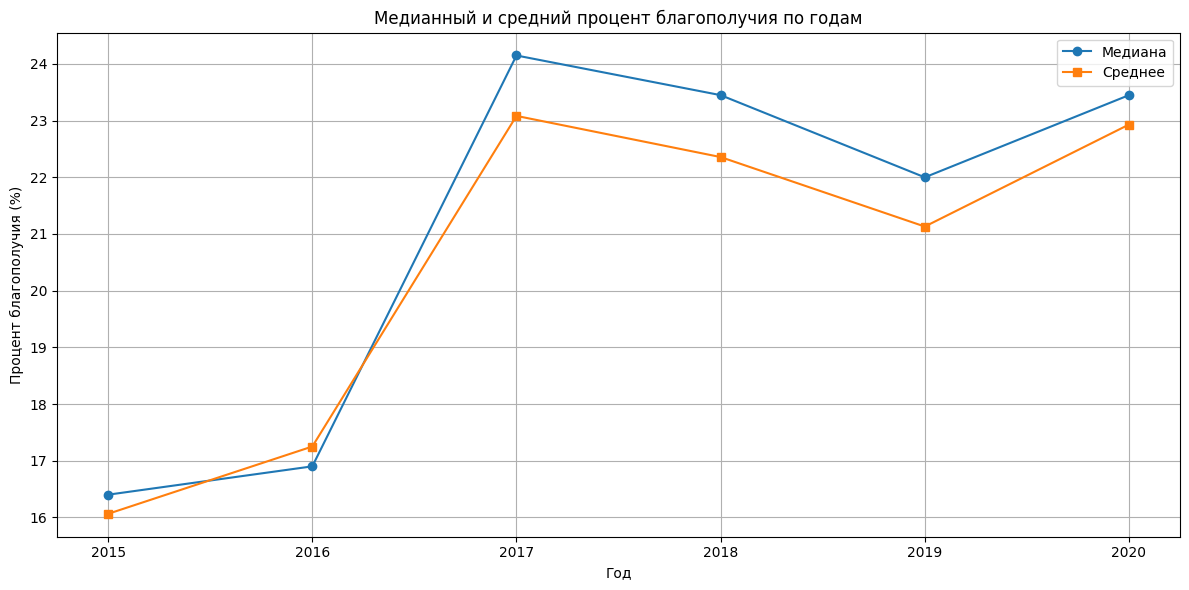

<Figure size 1600x600 with 0 Axes>

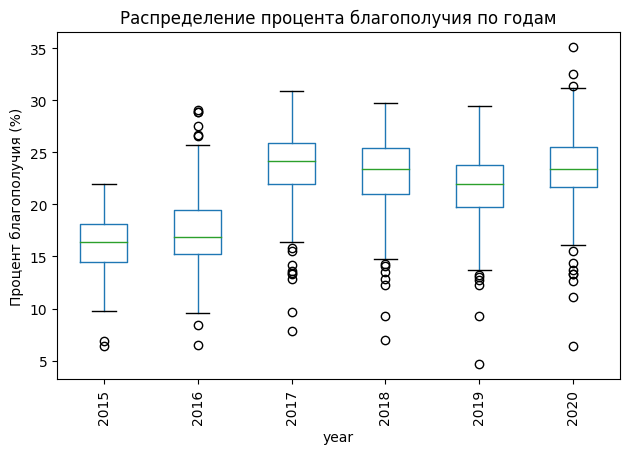

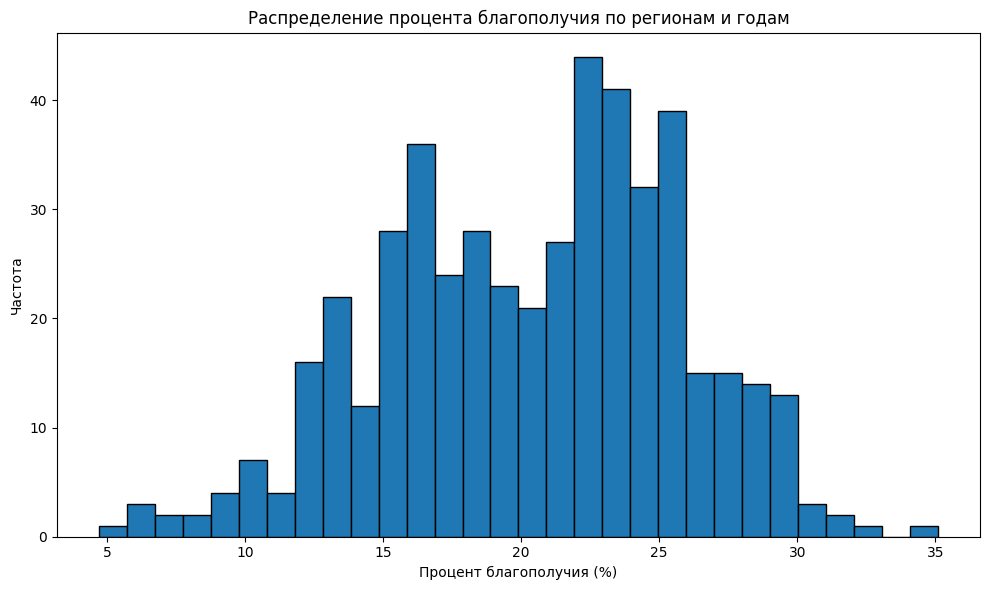

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
file_path = "../../outputs/standardized_datasets/welfare_standardized.csv"
df = pd.read_csv(file_path)

# 2. Оставляем только строки с region_standard
df = df[df["region_standard"].notna()]

# 3. Проверка типов и пропусков
print(df.info())
print("\nПропуски по колонкам:\n", df.isnull().sum())

# 4. Уникальные регионы и годы
print("\nУникальных регионов:", df["region_standard"].nunique())
print("Уникальных лет:", df["year"].nunique())

# 5. Статистика по проценту благополучия
print("\nСтатистика процента благополучия:\n", df["welfare_percent"].describe())

# 6. Проверка дубликатов
duplicates = df.duplicated().sum()
print("\nКоличество дубликатов:", duplicates)

# 7. Проверка выбросов через IQR
Q1 = df["welfare_percent"].quantile(0.25)
Q3 = df["welfare_percent"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["welfare_percent"] < lower_bound) | (df["welfare_percent"] > upper_bound)]
print("\nКоличество выбросов:", outliers.shape[0])

# 8. Топ-5 по максимальным значениям
top5 = df.sort_values(by="welfare_percent", ascending=False).head(5)
print("\nТоп-5 записей:\n", top5[["region_standard", "year", "welfare_percent"]])

# 9. Тренды медианы и среднего
median_welfare = df.groupby("year")["welfare_percent"].median()
mean_welfare = df.groupby("year")["welfare_percent"].mean()

plt.figure(figsize=(12,6))
plt.plot(median_welfare.index, median_welfare.values, marker="o", label="Медиана")
plt.plot(mean_welfare.index, mean_welfare.values, marker="s", label="Среднее")
plt.title("Медианный и средний процент благополучия по годам")
plt.xlabel("Год")
plt.ylabel("Процент благополучия (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. Boxplot
plt.figure(figsize=(16,6))
df.boxplot(column="welfare_percent", by="year", grid=False, rot=90)
plt.title("Распределение процента благополучия по годам")
plt.suptitle("")
plt.ylabel("Процент благополучия (%)")
plt.tight_layout()
plt.show()

# 11. Гистограмма
plt.figure(figsize=(10,6))
plt.hist(df["welfare_percent"], bins=30, edgecolor="black")
plt.title("Распределение процента благополучия по регионам и годам")
plt.xlabel("Процент благополучия (%)")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()


# EDA таблицы `welfare_standardized.csv`
**Описание данных**
- 480 записей по 80 регионам.
- Период наблюдений: 6 лет.
- Показатель: процент населения с доходами выше прожиточного минимума.

---

**Типы данных**
- Все признаки корректны:
  - `year`: int64
  - `welfare_percent`: float64
  - `region_standard`: object

---

**Пропуски**
- Отсутствуют.

---

**Дубликаты**
- Не обнаружено.

---

**Основные статистики**
- Среднее значение: ~20.5%.
- Медиана: ~21.4%.
- Минимум: 4.7%.
- Максимум: 35.1%.
- 75% регионов — до ~24.2%.

---

**Выбросы**
- Количество выбросов по IQR: 1 запись.
- Минимальное значение (Чукотский АО — 4.7%).
- **Удалять не требуется**, так как данные реалистичны.

---

**Топ-5 регионов по максимальному проценту**
1. Чеченская Республика (35.1%)
2. Республика Ингушетия (32.5%)
3. Астраханская область (31.4%)
4. Еврейская автономная область (31.2%)
5. Алтайский край (30.9%)

---

**Тренды**
- Медианное значение относительно стабильно.
- Среднее также демонстрирует лёгкий рост.
- Разрыв между регионами сохраняется.

---

**Визуализации**
- Boxplot показывает умеренный разброс.
- Гистограмма подтверждает, что большинство значений в диапазоне 15–25%.
- Линии трендов иллюстрируют стабильную динамику.

---

**Вывод**
- Данные полные и готовы к дальнейшему анализу и объединению.
- При моделировании можно использовать без очистки от выбросов.


In [2]:
# Cохранение результатов после EDA
df.to_csv("../../data/clean/welfare_AfterEDA.csv", index=False)